In [1]:
import pandas as pd
from itertools import zip_longest

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_bars(data, title, x, y, to_filename):

    f, ax = plt.subplots(1, figsize=(12,5))
    
    # plot bars, set title and labels
    sns.barplot(x=x, y=y, data=data, ax=ax)
    ax.set_title(title, fontsize=20, pad=20, loc='left')
    ax.xaxis.set_tick_params(labelsize=12)
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
    ax.set_xlabel('')
    sns.despine(f)
    
    # label bars
    for bar in ax.patches:
        bar_height = int(bar.get_height())
        ax.annotate(bar_height, (bar.get_x() + bar.get_width()/2, bar.get_height()*1.01), 
                    ha='center', color='black', fontsize=10)
    
    # save to file
    if to_filename:
        f.savefig(f'images/{to_filename}.png', transparent=True, bbox_inches="tight")



def plot_kdeplots(df, to_filename):

    f, axs = plt.subplots(3, 2, figsize=(12,15))
    for i, cs in enumerate(zip(*[iter(df.columns[:-1])]*2)):
        for j, c in enumerate(cs):
            sns.kdeplot(data=df, x=c, hue='recent_trend_cat', ax=axs[i][j])
            axs[i][j].set_title(c.replace('_', ' ').title())
            sns.despine()
            axs[i][j].set_xlabel(None)
                        
    f.savefig(f'images/{to_filename}.png', transparent=True, bbox_inches="tight")

In [3]:
df = pd.read_csv('../project_workflow/data/processed/full_county_dataset.csv')

In this dataset, `recent_trend_cat` is our variable of interest.

In [4]:
df['recent_trend_cat'].value_counts(dropna=False)

stable     1988
NaN         716
rising      378
falling      60
Name: recent_trend_cat, dtype: int64

## The target variable

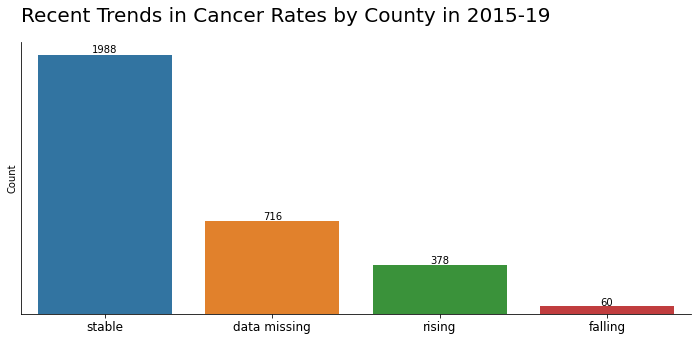

In [5]:
y_data = df['recent_trend_cat'].value_counts(dropna=False).to_frame('Count').reset_index().fillna('data missing')
plot_bars(y_data, 'Recent Trends in Cancer Rates by County in 2015-19', 'index', 'Count', to_filename='y_val')

There are missing values in it. Since we can't say anything about these observations, we drop them.

In [6]:
df = df[df['recent_trend_cat'].notna()].copy()

In [7]:
for tpl in zip_longest(*[iter(df.columns.tolist())]*5):
    print(' || '.join(x.ljust(20, ' ')[:20] if x else '' for x in tpl))

name                 || fips                 || age_over_65          || state                || pop2000             
pop2010              || pop2017              || pop_change           || poverty              || homeownership       
multi_unit           || unemployment_rate    || metro                || median_edu           || median_hh_income    
smoking_ban          ||  FIPS                || incidence_rate_per_1 || recent_trend_cat     || 5yr_trend           
County-State         || chem_companies       || unique_reported_chem || chem_Isododecenone   || chem_Borated reactio
chem_Tetraalkoxy tit || chem_(Substituted-5- || chem_Reaction produc || chem_Reaction produc || chem_Diazotized subs
chem_Ammonium salt o || chem_Alkanolamine sa || chem_Phosphosulfuriz || chem_Mixed borate es || chem_Reaction produc
chem_Substituted ure || chem_Salt of aminoet || chem_Substituted 4-a || chem_Alkyl acrylate  || chem_Formaldehyde   
chem_Guanidine, hydr || chem_Propanoic acid, || chem_Benzo[a]pyr

## Demographic data

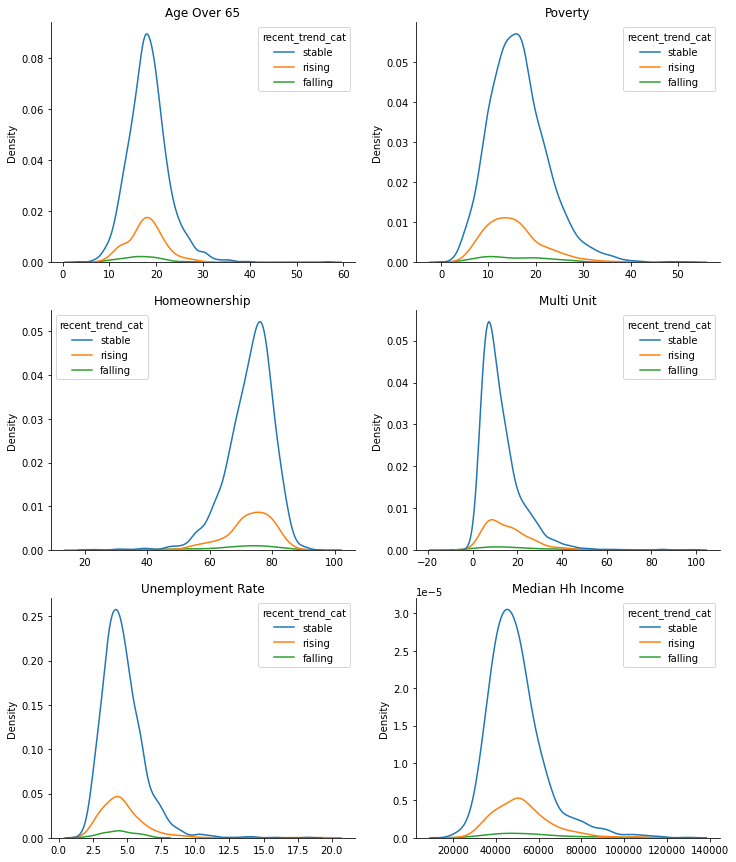

In [8]:
cols1 = ['age_over_65', 'poverty', 'homeownership', 'multi_unit', 'unemployment_rate', 'median_hh_income']
#cols2 = [, 'incidence_rate_per_100k', '5yr_trend']
#cols3 = ['unique_reported_chemicals', 'smoking_ban', 'metro', 'median_edu']

plot_kdeplots(df[[*cols1, 'recent_trend_cat']], '1-kde')
#plot_kdeplots(df[[*cols2, 'recent_trend_cat']], '2-kde')
# plot_kdeplots(df[[*cols3, 'recent_trend_cat']], '3-kde')

In [9]:
df.shape

(2426, 6803)